In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
from scipy.stats import norm
from scipy.stats import f_oneway
sns.set_style('darkgrid')

# TUBES PROBSTAT
 NAMA      : Ken Azizan\n
 KELAS     : K1\n
 NIM       : 18221107\n
 JURUSAN   : STI - GANESHA\n
 DOSEN     : DIMITRI MAHAYANA\n

In [5]:
df = pd.read_excel('18221107.xlsx')

# DATA CLEANSING
menghapus semua orang yang berusia diatas 100

In [6]:
df.drop(df.loc[df["Usia"] > 100].index, inplace = True)

# ENUMERATE

In [214]:
pd.DataFrame(enumerate(df.columns)).to_excel('col tubes.xlsx')

## NOMOR 1
menampilkan Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi jenis kelamin responden.

<AxesSubplot:ylabel='Jenis Kelamin'>

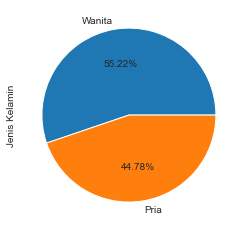

In [7]:
df["Jenis Kelamin"].value_counts().plot(kind="pie",autopct = '%1.2f%%')

## NOMOR 2
Buat tabel frekuensi dan proporsi untuk jenis kelamin responden

In [8]:
djeniskelamin = df['Jenis Kelamin'].value_counts()
djeniskelamin_p = (df['Jenis Kelamin'].value_counts()/len(df))
djeniskelamin = pd.concat([djeniskelamin, djeniskelamin_p], axis = 1)
djeniskelamin.columns = ['Frekuensi', 'Proporsi']
djeniskelamin.index.name = "Jenis Kelamin"
djeniskelamin

,Frekuensi,Proporsi
Jenis Kelamin,,
Wanita,164,0.550336
Pria,133,0.446309


## NOMOR 3
Buat histogram untuk data umur responden.

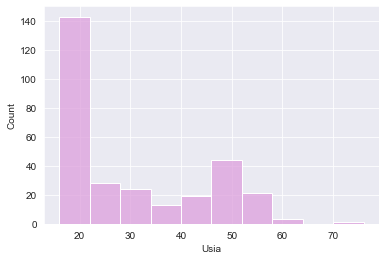

In [9]:
sns.histplot (data = df, x = 'Usia', bins = 10, color = "plum")
plt.show()

## NOMOR 4 
Buat boxplot untuk data umur responden.

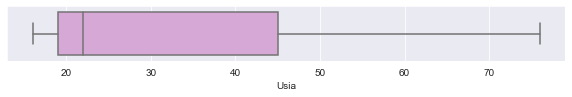

In [10]:
plt.figure(figsize = (10,1))
sns.boxplot(data = df, x = 'Usia', color = 'plum')
plt.show()

## NOMOR 5
Identifikasi nilai mean, Q1, Q2/median, Q3, min, max dari data umur responden.

In [11]:
q1 = df["Usia"].quantile(0.25)
q2 = df["Usia"].quantile(0.5)
q3 = df["Usia"].quantile(0.75)
maks = df["Usia"].max()
minimum = df["Usia"].min()
q1,q2,q3,maks,minimum

(19.0, 22.0, 45.0, 76.0, 16.0)

## NOMOR 6
Apakah terdapat outlier pada data umur responden. (Definisi outlier : < Q1 – 1.5 IQR
atau > Q3 + 1.5 IQR; IQR = Q3 – Q1)

In [12]:
iqr = q3 - q1
f'Outlier: <{q1 - 1.5 * iqr}, > {q3 + 1.5 * iqr}'
#tidak ada data usia yang merupakan outlier, sehingga tidak perlu difiltering

'Outlier: <-20.0, > 84.0'

## NOMOR 7
Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi profesi responden

<AxesSubplot:xlabel='Frekuensi', ylabel='Pekerjaan'>

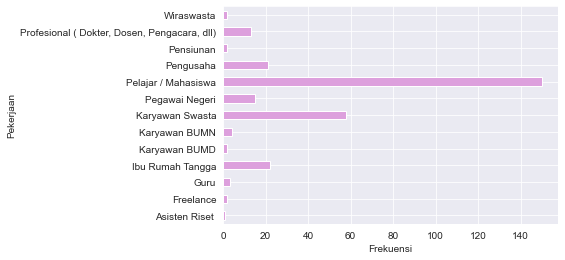

In [13]:
bar = df.groupby(["Pekerjaan"])["Pekerjaan"].size().plot(kind = "barh", color = "plum")
bar.set_xlabel("Frekuensi")
bar

## NOMOR 8
Buat tabel frekuensi dan proporsi untuk profesi responden

In [14]:
dpekerjaan = df['Pekerjaan'].value_counts()
dpekerjaan_proporsi = (df['Pekerjaan'].value_counts()/len(df))
dpekerjaan_tabel = pd.concat([dpekerjaan,dpekerjaan_proporsi], axis = 1)
dpekerjaan_tabel.columns = ['Frekuensi', 'Proporsi']
dpekerjaan_tabel.index.name = "Pekerjaan"
dpekerjaan_tabel

,Frekuensi,Proporsi
Pekerjaan,,
Pelajar / Mahasiswa,150,0.503356
Karyawan Swasta,58,0.194631
Ibu Rumah Tangga,22,0.073826
Pengusaha,21,0.070470
Pegawai Negeri,15,0.050336
"Profesional ( Dokter, Dosen, Pengacara, dll)",13,0.043624
Karyawan BUMN,4,0.013423
Guru,3,0.010067
Wiraswasta,2,0.006711


## NOMOR 9
Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan
terakhir.

<AxesSubplot:ylabel='Aktivitas Online Meningkat'>

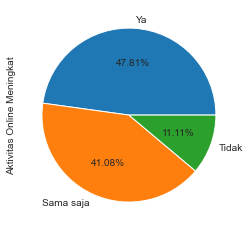

In [15]:
df["Aktivitas Online Meningkat"].value_counts().plot(kind="pie",autopct = '%1.2f%%')

## NOMOR 10
Buat tabel frekuensi dan proporsi untuk apakah aktivitas online responden meningkat
atau tidak dalam 3 bulan terakhir.

In [16]:
donline = df['Aktivitas Online Meningkat'].value_counts()
donline_proporsi = (df['Aktivitas Online Meningkat'].value_counts()/len(df))
donline_tabel = pd.concat([donline, donline_proporsi], axis = 1)
donline_tabel.columns = ['Frekuensi', 'Proporsi']
donline_tabel.index.name = "Aktivitas Online Meningkat"
donline_tabel

,Frekuensi,Proporsi
Aktivitas Online Meningkat,,
Ya,142,0.476510
Sama saja,122,0.409396
Tidak,33,0.110738


## NOMOR 11
Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 bank yang ada di
kolom bank_1 sampai bank_7

<AxesSubplot:xlabel='Frekuensi', ylabel='Bank'>

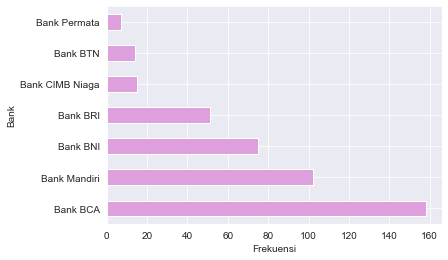

In [17]:
dbank = (df.iloc[:, 15:22]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending = False)
dbank = dbank.reset_index(name = 'Frekuensi').set_index('index')
dbank['Proporsi'] = dbank['Frekuensi']/len(df)
dbank.index.name = "Bank"

barbank = dbank["Frekuensi"].plot(kind="barh", color = "plum")
barbank.set_xlabel("Frekuensi")
barbank

## NOMOR 12
Buat tabel frekuensi dan proporsi pengguna 7 bank yang ada di kolom bank_1 sampai
bank_7

In [18]:
dbank = (df.iloc[:, 15:22]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending = False)
dbank = dbank.reset_index(name = 'Frekuensi').set_index('index')
dbank['Proporsi'] = dbank['Frekuensi']/len(df)
dbank.index.name = "Bank"
dbank

,Frekuensi,Proporsi
Bank,,
Bank BCA,158.0,0.530201
Bank Mandiri,102.0,0.342282
Bank BNI,75.0,0.251678
Bank BRI,51.0,0.171141
Bank CIMB Niaga,15.0,0.050336
Bank BTN,14.0,0.046980
Bank Permata,7.0,0.023490


## NOMOR 13
Hitung confidence interval 95% untuk proporsi pengguna Bank BCA:

In [19]:
alpha = 0.05
z_alphaper2 = norm.ppf(1-alpha/2)
n = len(df)
proporsiBCA = dbank.iloc[0,1]

error = z_alphaper2 * ((proporsiBCA * (1-proporsiBCA))/n)**0.5
LB = proporsiBCA - error
UB = proporsiBCA + error
print(LB,"< Proporsi BCA < ",UB)

0.47353616442738067 < Proporsi BCA <  0.5868665201363777


## NOMOR 14

Lakukan uji hipotesis berikut:

H0: proporsi BCA = 0.5
H1: proporsi BCA ≠ 0.5
alpha = 5%

In [20]:
P0_BCA = 0.5
PBCA = dbank.iloc[0,1]
alpha = 0.05
z_alphaper2 = norm.ppf(1-alpha/2)
n = len(df)

#crit region
print(f'Crit Region : t< -{z_alphaper2}, t > {z_alphaper2}')

#nilai statistik uji
z = ((n * PBCA) - (n * P0_BCA))/((n * P0_BCA * (1 - P0_BCA))**0.5)
print("nilai statistik uji : ",z)

#kesimpulan
print("Kesimpulan : Z diluar crit region, H0 gagal ditolak")
      
#pvalue
pvalue= 2 * (1 - norm.cdf(z))
print ("Pvalue = ",pvalue)

Crit Region : t< -1.959963984540054, t > 1.959963984540054
nilai statistik uji :  1.042712003454286
Kesimpulan : Z diluar crit region, H0 gagal ditolak
Pvalue =  0.2970816968525196


## NOMOR 15
Buat bar chart yang menunjukkan perbedaan frekuensi / proporsi untuk preferensi
channel yang dipilih responden untuk melakukan “Transfer antar bank”.

<AxesSubplot:xlabel='Frekuensi', ylabel='Transfer antar bank'>

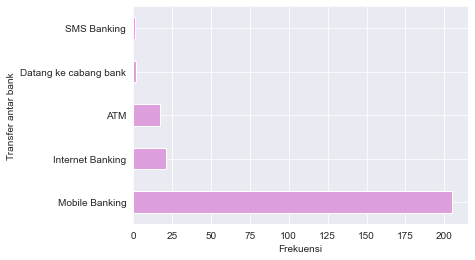

In [21]:
dtf = df.iloc[: , 30].value_counts()
dtf_proporsi = df.iloc[: , 30].value_counts()/len(df)
dtf_tabel = pd.concat([dtf, dtf_proporsi], axis = 1)
dtf_tabel.columns = ['Frekuensi', 'Proporsi']
dtf_tabel.index.name = "Transfer antar bank"
dtf_tabel

trfbank = dtf_tabel["Frekuensi"].plot(kind="barh", color = "plum")
trfbank.set_xlabel("Frekuensi")
trfbank

## NOMOR 16
Buat tabel frekuensi dan proporsi untuk preferensi channel yang dipilih responden
untuk melakukan “Transfer antar bank”.

In [22]:
dtf = df.iloc[: , 30].value_counts()
dtf_proporsi = df.iloc[: , 30].value_counts()/len(df)
dtf_tabel = pd.concat([dtf, dtf_proporsi], axis = 1)
dtf_tabel.columns = ['Frekuensi', 'Proporsi']
dtf_tabel.index.name = "Transfer antar bank"
dtf_tabel

,Frekuensi,Proporsi
Transfer antar bank,,
Mobile Banking,205,0.687919
Internet Banking,21,0.070470
ATM,17,0.057047
Datang ke cabang bank,2,0.006711
SMS Banking,1,0.003356


## NOMOR 17
Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 emoney yang ada di
kolom emoney_pilihan_1 sampai emoney_pilihan_7 (8 – 11 tidak usah)

<AxesSubplot:xlabel='E-money', ylabel='Frekuensi'>

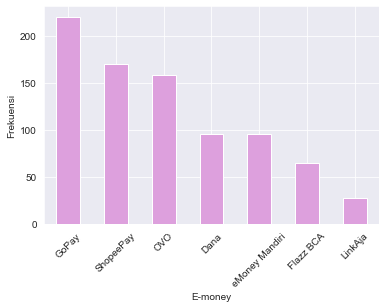

In [23]:
demoney = (df.iloc[:, 37:44]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending = False)
demoney = demoney.reset_index(name = 'Frekuensi').set_index('index')
demoney['Proporsi'] = demoney['Frekuensi']/len(df)
demoney.index.name = "E-money"
demoney

baremoney = demoney["Frekuensi"].plot(kind="bar", color = "plum")
baremoney.set_ylabel("Frekuensi")
plt.xticks(rotation = 45)
baremoney

## NOMOR 18
Buat tabel frekuensi dan proporsi pengguna 7 emoney yang ada di kolom
emoney_pilihan_1 sampai emoney_pilihan_7 (8 – 11 tidak usah)

In [24]:
demoney = (df.iloc[:, 37:44]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending = False)
demoney = demoney.reset_index(name = 'Frekuensi').set_index('index')
demoney['Proporsi'] = demoney['Frekuensi']/len(df)
demoney.index.name = "E-money"
demoney

,Frekuensi,Proporsi
E-money,,
GoPay,220.0,0.738255
ShopeePay,170.0,0.570470
OVO,158.0,0.530201
Dana,95.0,0.318792
eMoney Mandiri,95.0,0.318792
Flazz BCA,65.0,0.218121
LinkAja,27.0,0.090604


## NOMOR 19
Hitung confidence interval 95% untuk selisih proporsi pengguna Gopay dan OVO.

In [25]:
pgopay = demoney.iloc[0,1]
povo =  demoney.iloc[2,1]
alpha = 0.05
n1 = len(df)
n2 = len(df)
z_alphaper2 = norm.ppf(1-alpha/2)

eror = z_alphaper2 * ((pgopay * (1-pgopay) / n1)+(povo * (1-povo) /n2))**0.5
pgopay_kurang_Povo = pgopay - povo

LB = pgopay_kurang_Povo - eror
UB = pgopay_kurang_Povo + eror

print(LB, "< PGopay - Povo <", UB)

0.13254282815455187 < PGopay - Povo < 0.28356455439578376


## NOMOR 20
H1: PGopay = Povo
H0: PGopay > Povo
alpha = 5%

In [26]:
pgopay = demoney.iloc[0,1]
povo =  demoney.iloc[2,1]
xgopay = demoney.iloc[0,0]
xovo =  demoney.iloc[2,0]
alpha = 0.05
n1 = len(df)
n2 = len(df)
z_alpha = norm.ppf(1-alpha)
pgopay_kurang_Povo = pgopay - povo

#mencari phat
phat = (xgopay+xovo)/(n1+n2)

#crit region
print(f'Crit Region :t > {z_alpha}')

#mencari nilai statistik uji
z = (pgopay_kurang_Povo)/(phat * (1-phat) * ((1/n1)+(1/n2)))**0.5
print("niali statistik uji : ",z)

#kesimpulan
print("Kesimpulan : Z didalam crit region, H0 ditolak")

#pvalue
pvalue= 1 - norm.cdf(z)
print ("Pvalue = ",pvalue)

Crit Region :t > 1.6448536269514722
niali statistik uji :  5.272792399881485
Kesimpulan : Z didalam crit region, H0 ditolak
Pvalue =  6.718176159825617e-08


## NOMOR 21
Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi untuk nominal yang biasa dipakai untuk top up emoney.

<AxesSubplot:xlabel='Frekuensi', ylabel='nominal top up'>

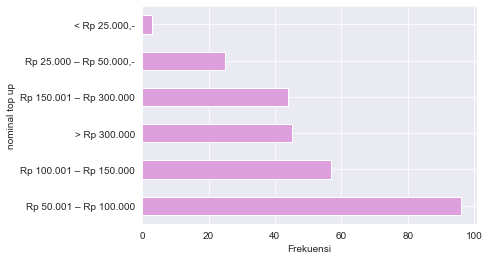

In [27]:
dto = df.iloc[:, 70].value_counts()
dto_proporsi = (df.iloc[:, 70].value_counts()/len(df))
dto_tabel = pd.concat([dto, dto_proporsi], axis = 1)
dto_tabel.columns = ['Frekuensi', 'Proporsi']
dto_tabel.index.name = "nominal top up"
dto_tabel

bar = dto_tabel["Frekuensi"].plot(kind="barh", color = "plum")
bar.set_xlabel("Frekuensi")
bar

## NOMOR 22
Buat tabel frekuensi dan proporsi untuk nominal yang biasa dipakai untuk top up
emoney.

In [28]:
dto = df.iloc[:, 70].value_counts()
dto_proporsi = (df.iloc[:, 70].value_counts()/len(df))
dto_tabel = pd.concat([dto, dto_proporsi], axis = 1)
dto_tabel.columns = ['Frekuensi', 'Proporsi']
dto_tabel.index.name = "nominal top up"
dto_tabel

,Frekuensi,Proporsi
nominal top up,,
Rp 50.001 – Rp 100.000,96,0.322148
Rp 100.001 – Rp 150.000,57,0.191275
> Rp 300.000,45,0.151007
Rp 150.001 – Rp 300.000,44,0.147651
"Rp 25.000 – Rp 50.000,-",25,0.083893
"< Rp 25.000,-",3,0.010067


# NOMOR 23
Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 ecommerce yang ada
di kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah)

<AxesSubplot:xlabel='Frekuensi', ylabel='E-Commerce'>

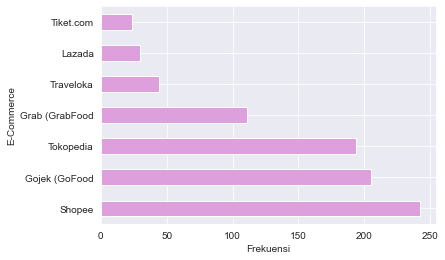

In [29]:
decomm = (df.iloc[:, 116:123]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending = False)
decomm = decomm.reset_index(name = 'Frekuensi').set_index('index')
decomm['Proporsi'] = decomm['Frekuensi']/len(df)
decomm.index.name = "E-Commerce"

bar = decomm["Frekuensi"].plot(kind="barh", color = "plum")
bar.set_xlabel("Frekuensi")
bar

# NOMOR 23
Buat tabel frekuensi dan proporsi pengguna 7 ecommerce yang ada di kolom
ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah)

In [30]:
decomm = (df.iloc[:, 116:123]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending = False)
decomm = decomm.reset_index(name = 'Frekuensi').set_index('index')
decomm['Proporsi'] = decomm['Frekuensi']/len(df)
decomm.index.name = "E-Commerce"
decomm

,Frekuensi,Proporsi
E-Commerce,,
Shopee,242.0,0.812081
Gojek (GoFood,205.0,0.687919
Tokopedia,194.0,0.651007
Grab (GrabFood,111.0,0.372483
Traveloka,44.0,0.147651
Lazada,30.0,0.100671
Tiket.com,24.0,0.080537


# NOMOR 25
Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi untuk responden yang prefer beli handphone secara offline vs online

<AxesSubplot:xlabel='prefer handphone', ylabel='Frekuensi'>

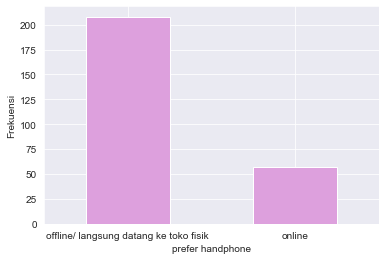

In [31]:
dhp = df.iloc[:,99].value_counts()
dhp_proporsi = (df.iloc[:,99].value_counts()/len(df))
dhp_tabel = pd.concat([dhp, dhp_proporsi], axis = 1)
dhp_tabel.columns = ['Frekuensi', 'Proporsi']
dhp_tabel.index.name = "prefer handphone"
dhp_tabel.index.name = "prefer handphone"
dhp_tabel

barhp = dhp_tabel["Frekuensi"].plot(kind="bar", color = "plum")
barhp.set_ylabel("Frekuensi")
plt.xticks(rotation = 0)
barhp

# NOMOR 26
Buat tabel frekuensi dan proporsi untuk responden yang prefer beli handphone secara
offline vs online

In [32]:
dhp = df.iloc[:,99].value_counts()
dhp_proporsi = (df.iloc[:,99].value_counts()/len(df))
dhp_tabel = pd.concat([dhp, dhp_proporsi], axis = 1)
dhp_tabel.columns = ['Frekuensi', 'Proporsi']
dhp_tabel.index.name = "prefer handphone"
dhp_tabel.index.name = "prefer handphone"
dhp_tabel

,Frekuensi,Proporsi
prefer handphone,,
offline/ langsung datang ke toko fisik,208,0.697987
online,57,0.191275


# NOMOR 27
Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi untuk tempat beli makanan online yang pilihan responden

<AxesSubplot:xlabel='Food Delivery', ylabel='Frekuensi'>

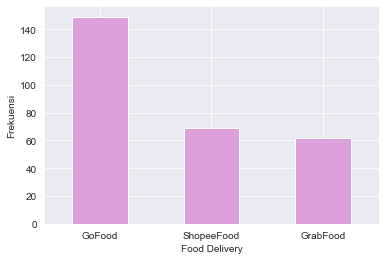

In [33]:
dfmakan = df.iloc[:,128]
dfmakanan = dfmakan.loc[(dfmakan.iloc[0:len(df)] == 'ShopeeFood') | (dfmakan.iloc[0:len(df)] == 'GoFood') | (dfmakan.iloc[0:len(df)] == 'GrabFood')]
dmakan = dfmakanan.value_counts()
dmakan_proporsi = (dfmakanan.value_counts()/len(df))
dmakan_tabel = pd.concat([dmakan, dmakan_proporsi], axis = 1)
dmakan_tabel.columns = ['Frekuensi', 'Proporsi']
dmakan_tabel.index.name = "Food Delivery"
dmakan_tabel 

barmakan = dmakan_tabel["Frekuensi"].plot(kind="bar", color = "plum")
barmakan.set_ylabel("Frekuensi")
plt.xticks(rotation = 0)
barmakan

# NOMOR 28
Buat tabel frekuensi dan proporsi untuk tempat beli makanan online yang pilihan
responden

In [34]:
dfmakan = df.iloc[:,128]
dfmakanan = dfmakan.loc[(dfmakan.iloc[0:len(df)] == 'ShopeeFood') | (dfmakan.iloc[0:len(df)] == 'GoFood') | (dfmakan.iloc[0:len(df)] == 'GrabFood')]
dmakan = dfmakanan.value_counts()
dmakan_proporsi = (dfmakanan.value_counts()/len(df))
dmakan_tabel = pd.concat([dmakan, dmakan_proporsi], axis = 1)
dmakan_tabel.columns = ['Frekuensi', 'Proporsi']
dmakan_tabel.index.name = "Food Delivery"
dmakan_tabel 

,Frekuensi,Proporsi
Food Delivery,,
GoFood,149,0.500000
ShopeeFood,69,0.231544
GrabFood,62,0.208054


# NOMOR 29
Lakukan One Way ANOVA Test berikut:
H0: Mean umur pengguna gofood = mean umur pengguna grabfood = mean umur
pengguna shopeefood
H1: Setidaknya ada dua grup yang memiliki mean umur yang berbeda

alpha: 5%

In [35]:
dfmakan = df.iloc[:,128]
dfmakanan = df.loc[(dfmakan.iloc[0:len(df)] == 'ShopeeFood') | (dfmakan.iloc[0:len(df)] == 'GoFood') | (dfmakan.iloc[0:len(df)] == 'GrabFood')]
dfmakanan = dfmakanan.rename(columns={'50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?': 'Delivery'})
#tabel_anova
mod = ols('Usia ~ C(Delivery)', data = dfmakanan).fit()
tabel = sm.stats.anova_lm(mod, typ=1)
print(tabel)
print(" ")

#identifikasi crit region
f_alpha = st.f.ppf(0.95, dfn = 2, dfd = 276)
print(f'Crit Region: f > {f_alpha}')

#print kesimpulan
print(" ")
print("Kesimpulan : f didalam critical region, H0 ditolak ")

#pvalue
pvalue = 1 - st.f.cdf(9.929029, 2, 276)
print(" ")
print("pvalue =", pvalue)

                df        sum_sq      mean_sq         F    PR(>F)
C(Delivery)    2.0   3395.737566  1697.868783  9.929029  0.000069
Residual     276.0  47196.133402   171.000483       NaN       NaN
 
Crit Region: f > 3.028484828906624
 
Kesimpulan : f didalam critical region, H0 ditolak 
 
pvalue = 6.853995529365609e-05


# NOMOR 30
Tuliskan minimal 5 insights/pelajaran dari hasil pengolahan data responden

In [37]:
print(
    "Berdasarkan pengolahan data yang telah dilakukan : \n"
    "1. Aktivitas online responden pada tiga bulan terakhir meningkat \n"
    "2. Bank yang paling banyak digunakan oleh responden adalah Bank BCA\n"
    "3. Mayoritas responden menggunaknan mobile banking dalam kegiatan transfer antar bank\n"
    "4. Emoney yang paling banyak digunakan adalah gopay sedangkan yang paling sedikit digunakan adalah linkaja\n"
    "5. E-commerce yang menduduki peringkat paling atas dalam banyak responden yang memakai adalah shopee\n"
    "6. Dalam pembelian handphone responden lebih memilih untuk datang ke toko fisik\n"
    "7. Go-foof menjadi layanan food delivery yang paling banyak digunakan oleh responden\n"
)

Berdasarkan pengolahan data yang telah dilakukan : 
1. Aktivitas online responden pada tiga bulan terakhir meningkat 
2. Bank yang paling banyak digunakan oleh responden adalah Bank BCA
3. Mayoritas responden menggunaknan mobile banking dalam kegiatan transfer antar bank
4. Emoney yang paling banyak digunakan adalah gopay sedangkan yang paling sedikit digunakan adalah linkaja
5. E-commerce yang menduduki peringkat paling atas dalam banyak responden yang memakai adalah shopee
6. Dalam pembelian handphone responden lebih memilih untuk datang ke toko fisik
7. Go-foof menjadi layanan food delivery yang paling banyak digunakan oleh responden

